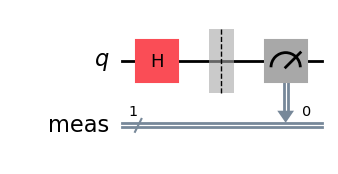

In [9]:
from qiskit.circuit.library import HGate
from qiskit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from PIL import Image
import math


# Simulatoren
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
from qiskit_aer import AerSimulator


# Quantencircuit erstellen
hadamard_gate = HGate()
circuit = QuantumCircuit(1)
circuit.append(hadamard_gate, [0])
circuit.measure_all()

# Quantencircuit anzeigen
circuit.draw("mpl")

In [35]:
# Füge deinen API-Token ein:
token = ""

# Speichere das Konto lokal und setze es als Standard:
QiskitRuntimeService.save_account(
    channel="ibm_cloud",         # oder "ibm_quantum_platform" bei neuer Plattform
    token=token,
    instance="Projekt Zufall 1",  # Instanzname
    overwrite=True,
    set_as_default=True
)

In [60]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
service = QiskitRuntimeService()  # lädt deine gespeicherten Credentials
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_torino')>]


In [40]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

backend_name = service.backend(name = 'ibm_brisbane')

sampler = Sampler(mode=backend_name)
job = sampler.run([isa_circuit], shots = 1000)

print("Job-ID:", job.job_id())

Job-ID: d1mh6jn29o4s73ar12fg


In [28]:
print(job.status())

QUEUED


In [41]:
job.cancel()
print(job.status())

CANCELLED


In [51]:
# (irgendeinen) Job laden, nach Job ID

job_id = 'd1mf95n29o4s73aqu9c0'
job = service.job(job_id)

# 4. Warten bis abgeschlossen
job_status = job.status()
print(f"Job-Status: {job_status}")
result = job.result()

Job-Status: DONE


In [52]:
result = job.result()
print("Ergebnisse auf echter Hardware:", result)

Ergebnisse auf echter Hardware: {'results': [{'data': {'c': {'samples': ['0x1', '0x1', '0x0', '0x0', '0x1', '0x0', '0x0', '0x0', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x0', '0x0', '0x1', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x0', '0x0', '0x0', '0x0', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x0', '0x0', '0x1', '0x0', '0x0', '0x0', '0x1', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x0', '0x1', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x0', '0x1', '0x0', '0x0', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x0', '0x0', '0x1', '0x

In [53]:
# Verwendbare Werte
samples = result['results'][0]['data']['c']['samples']
samples_int = [int(s, 16) for s in samples]
print(samples_int)

[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 

In [58]:
def csvBits(samples_int): 
    # Umwandeln in eine Liste von Listen
    memory_rows = [[bit] for bit in samples_int]
    with open("C:/Users/jojot/Documents/Quantum_Computing_Team/Quantum_Computing_Team/Projekt Zufall/Ergebnisse/ergebnisseIBMBits.csv", "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(memory_rows)

In [59]:
import csv
csvBits(samples_int)